In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# 1. DATA

In [2]:
df_sales = pd.read_csv('sales.csv', encoding = 'latin1')
df_activepromos = pd.read_csv('active_promos.csv')
df_clients = pd.read_csv('clients_attributes.csv')
df_executedpromos = pd.read_csv('executed_promos.csv')

In [4]:
df_sales.head()

,Cliente,Año,Mes,ClaseEnvase,SegmentoPrecio,Marca,Cupo,Nr,Hl,Dcto
0,1,2018,1,2,2.0,44,10.0,6352.94,0.03,0.0
1,1,2018,1,2,4.0,18,16.0,99130.50,0.45,0.0
2,1,2018,6,2,1.0,2,6.0,11605.40,0.07,-2880.0
3,1,2018,7,1,2.0,37,34.0,1944.01,0.01,0.0
4,1,2018,8,2,1.0,2,16.0,16250.18,0.06,0.0


In [5]:
df_activepromos.head()

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente
0,297601,29,9,2018-08-06,2018-08-30,3213
1,297601,29,9,2018-08-06,2018-08-30,3795
2,297601,29,9,2018-08-06,2018-08-30,11816
3,298856,40,16,2018-08-12,2018-08-19,8444
4,309916,40,16,2018-08-12,2018-08-19,8488


In [6]:
df_executedpromos.head()

,CodigoDC,Cliente,Marca,Cupo
0,297601,8410,29,9
1,297601,9337,29,9
2,309843,7404,40,16
3,309874,4017,40,16
4,309910,6316,40,16


In [7]:
df_clients.head()

,Cliente,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF
0,1,2009-03-03,4,21,12,1,1,1
1,9,2009-03-03,4,21,9,2,3,1
2,15,2009-03-03,4,21,9,2,3,0
3,37,2009-03-03,4,21,16,2,3,1
4,43,2009-03-03,4,21,9,2,3,0


# 2. Exploratorio

## 2.1 Sales

In [8]:
df_sales.count()/len(df_sales)

Cliente           1.000000
Año               1.000000
Mes               1.000000
ClaseEnvase       1.000000
SegmentoPrecio    0.999997
Marca             1.000000
Cupo              0.999997
Nr                1.000000
Hl                1.000000
Dcto              1.000000
dtype: float64

In [12]:
df_sales.dtypes

Cliente             int64
Año                 int64
Mes                 int64
ClaseEnvase         int64
SegmentoPrecio    float64
Marca               int64
Cupo              float64
Nr                float64
Hl                float64
Dcto              float64
dtype: object

Cliente


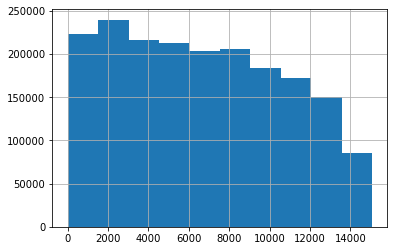

**
Año


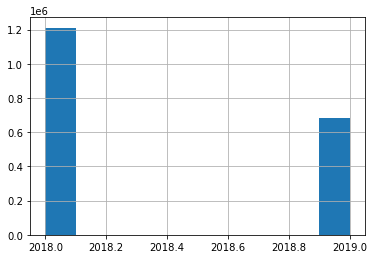

**
Mes


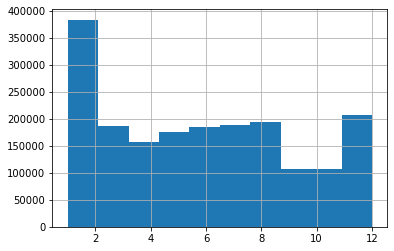

**
ClaseEnvase


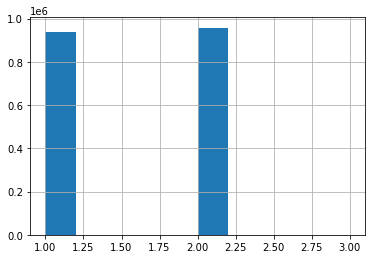

**
SegmentoPrecio


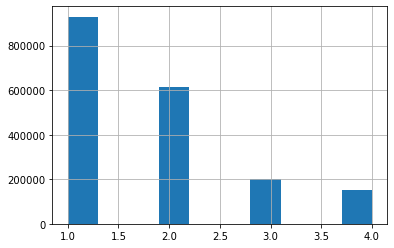

**
Marca


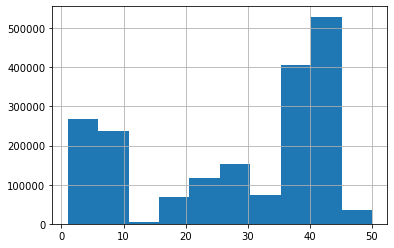

**
Cupo


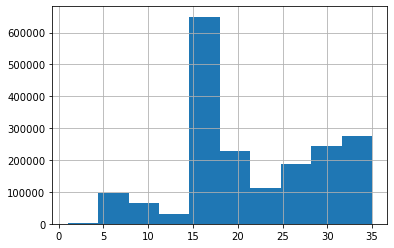

**
Nr


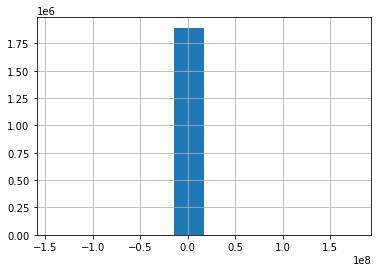

**
Hl


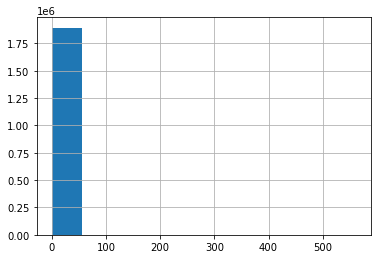

**
Dcto


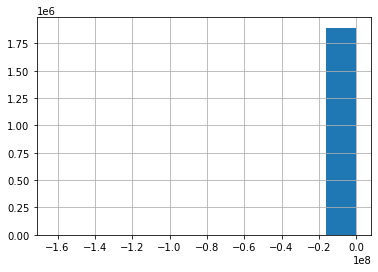

**


In [15]:
for col in list(df_sales):
    print(col)
    df_sales[col].hist()
    plt.show()
    print('**')

## 2.2 Active Promos

In [9]:
df_activepromos.count()/len(df_activepromos)

CodigoDC       1.0
Marca          1.0
Cupo           1.0
Fecha_Desde    1.0
Fecha_Hasta    1.0
Cliente        1.0
dtype: float64

In [16]:
df_activepromos.dtypes

CodigoDC        int64
Marca           int64
Cupo            int64
Fecha_Desde    object
Fecha_Hasta    object
Cliente         int64
dtype: object

CodigoDC


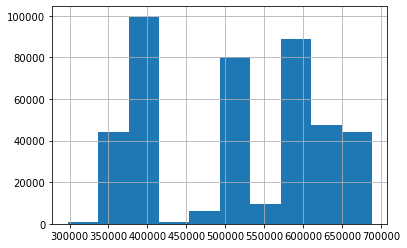

**
Marca


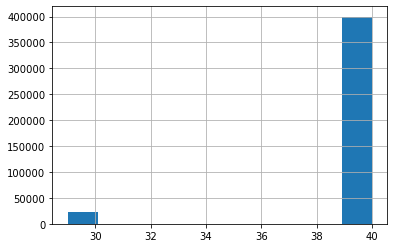

**
Cupo


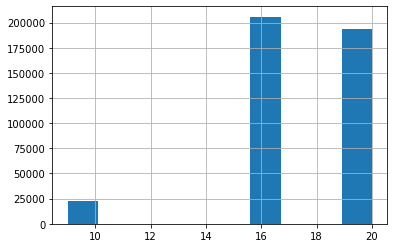

**
Fecha_Desde


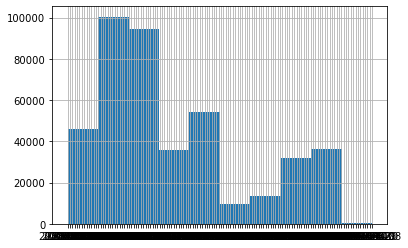

**
Fecha_Hasta


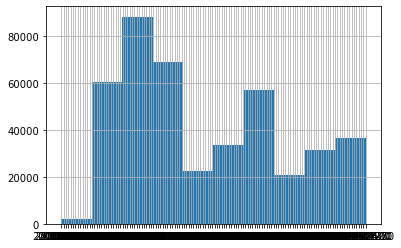

**
Cliente


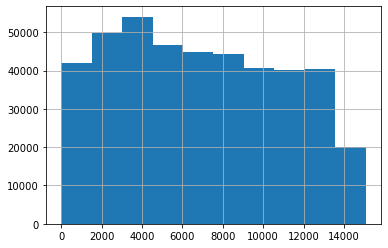

**


In [17]:
for col in list(df_activepromos):
    print(col)
    df_activepromos[col].hist()
    plt.show()
    print('**')

## 2.3 Executed Promos

In [10]:
df_executedpromos.count()/len(df_executedpromos)

CodigoDC    1.0
Cliente     1.0
Marca       1.0
Cupo        1.0
dtype: float64

In [18]:
df_executedpromos.dtypes

CodigoDC    int64
Cliente     int64
Marca       int64
Cupo        int64
dtype: object

CodigoDC


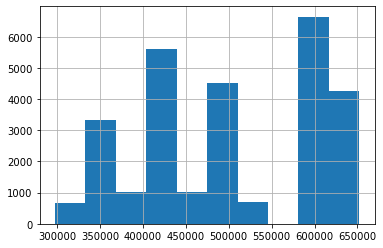

**
Cliente


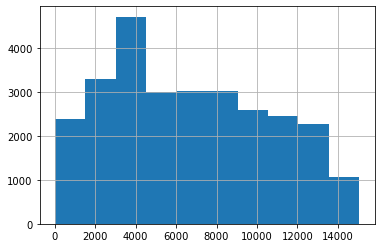

**
Marca


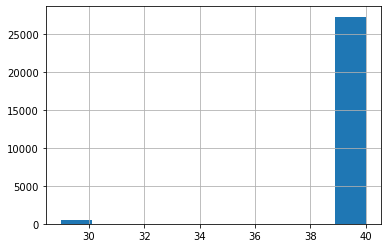

**
Cupo


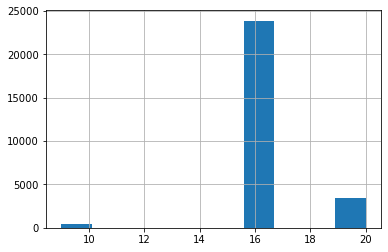

**


In [19]:
for col in list(df_executedpromos):
    print(col)
    df_executedpromos[col].hist()
    plt.show()
    print('**')

## 2.4 Cientes

In [11]:
df_clients.count()/len(df_clients)

Cliente             1.0
FechaAltaCliente    1.0
Region              1.0
Gerencia            1.0
SubCanal            1.0
TipoPoblacion       1.0
Estrato             1.0
EF                  1.0
dtype: float64

In [20]:
df_clients.dtypes

Cliente              int64
FechaAltaCliente    object
Region               int64
Gerencia             int64
SubCanal             int64
TipoPoblacion        int64
Estrato              int64
EF                   int64
dtype: object

In [22]:
df_clients.head()

,Cliente,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF
0,1,2009-03-03,4,21,12,1,1,1
1,9,2009-03-03,4,21,9,2,3,1
2,15,2009-03-03,4,21,9,2,3,0
3,37,2009-03-03,4,21,16,2,3,1
4,43,2009-03-03,4,21,9,2,3,0


In [23]:
df_clients['Cliente'].value_counts()

2047     1
2660     1
10880    1
4727     1
6774     1
        ..
13612    1
3371     1
1322     1
7465     1
2049     1
Name: Cliente, Length: 15069, dtype: int64

In [25]:
df_clients['Region'].value_counts()

3    4981
4    3531
1    3397
5    3157
2       3
Name: Region, dtype: int64

# 3. Cruce de dataframes

## 3.1 Dataframe PROMOS

In [37]:
df_executedpromos.shape, df_activepromos.shape

((27794, 5), (422437, 6))

In [40]:
# cruzamos data de promos activas y ejecutadas 
df_promo = df_activepromos.merge(df_executedpromos, how = 'left', on = ['CodigoDC', 'Cliente', 'Marca', 'Cupo'])

In [41]:
# rellenamos con 0
df_promo['Ejecuto_Promo'] = df_promo['Ejecuto_Promo'].fillna(0)

In [42]:
df_promo.head()

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente,Ejecuto_Promo
0,297601,29,9,2018-08-06,2018-08-30,3213,0.0
1,297601,29,9,2018-08-06,2018-08-30,3795,0.0
2,297601,29,9,2018-08-06,2018-08-30,11816,1.0
3,298856,40,16,2018-08-12,2018-08-19,8444,1.0
4,309916,40,16,2018-08-12,2018-08-19,8488,1.0


## 3.2 Dataframe Sales -> Target PROMO EJECUTADA (test1)

In [85]:
df_sales['anomesd'] = df_sales['Año'].astype('str') + '-' + df_sales['Mes'].astype('str').str.zfill(2)
df_sales['anomesh'] = df_sales['Año'].astype('str') + '-' + df_sales['Mes'].astype('str').str.zfill(2)

In [78]:
df_promo['anomesd'] = df_promo['Fecha_Desde'].str[:7]
df_promo['anomesh'] = df_promo['Fecha_Hasta'].str[:7]

In [79]:
df_promo.head()

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente,Ejecuto_Promo,anomesd,anomesh
0,297601,29,9,2018-08-06,2018-08-30,3213,0.0,2018-08,2018-08
1,297601,29,9,2018-08-06,2018-08-30,3795,0.0,2018-08,2018-08
2,297601,29,9,2018-08-06,2018-08-30,11816,1.0,2018-08,2018-08
3,298856,40,16,2018-08-12,2018-08-19,8444,1.0,2018-08,2018-08
4,309916,40,16,2018-08-12,2018-08-19,8488,1.0,2018-08,2018-08


Generamos id's para el dataframe promo basandonos en el mes de inicio y fin de la prom

In [102]:
df_promo['id1'] = df_promo['Cliente'].astype('str') + '-' + df_promo['Marca'].astype('str') + '-' + df_promo['Cupo'].astype('str') + '-' + df_promo['anomesd']

In [103]:
df_promo['id2'] = df_promo['Cliente'].astype('str') + '-' + df_promo['Marca'].astype('str') + '-' + df_promo['Cupo'].astype('str') + '-' + df_promo['anomesh']

In [106]:
# generamos listas
lista_desde = (df_promo.query("Ejecuto_Promo == 1.0")['id1'])
lista_hasta = (df_promo.query("Ejecuto_Promo == 1.0")['id2'])

In [107]:
len(set(lista_desde)), len(set(lista_hasta)), len(df_promo.query("Ejecuto_Promo == 1.0"))

(22085, 21995, 27794)

# CONSULTAR!!

In [108]:
df_promo.id1.value_counts()

3055-40-16-2018-10     10
3053-40-16-2018-10      9
2646-39-20-2018-11      9
2541-39-20-2018-11      9
7735-40-16-2018-10      9
                       ..
13106-39-20-2019-07     1
3429-29-9-2018-11       1
3609-39-20-2019-03      1
1119-29-9-2019-04       1
4441-39-20-2019-03      1
Name: id1, Length: 168790, dtype: int64

In [109]:
df_promo[df_promo['id1'] == '3055-40-16-2018-10']

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente,Ejecuto_Promo,anomesd,anomesh,id1,id2
56649,410715,40,16,2018-10-04,2018-10-04,3055,0.0,2018-10,2018-10,3055-40-16-2018-10,3055-40-16-2018-10
92518,465223,40,16,2018-10-18,2018-10-28,3055,0.0,2018-10,2018-10,3055-40-16-2018-10,3055-40-16-2018-10
109697,424751,40,16,2018-10-12,2018-10-28,3055,1.0,2018-10,2018-10,3055-40-16-2018-10,3055-40-16-2018-10
112941,411803,40,16,2018-10-05,2018-10-14,3055,0.0,2018-10,2018-10,3055-40-16-2018-10,3055-40-16-2018-10
133602,412529,40,16,2018-10-07,2018-10-18,3055,0.0,2018-10,2018-10,3055-40-16-2018-10,3055-40-16-2018-10
167468,412888,40,16,2018-10-08,2018-10-28,3055,1.0,2018-10,2018-10,3055-40-16-2018-10,3055-40-16-2018-10
226917,475652,40,16,2018-10-22,2018-10-22,3055,0.0,2018-10,2018-10,3055-40-16-2018-10,3055-40-16-2018-10
376335,424636,40,16,2018-10-12,2018-10-28,3055,1.0,2018-10,2018-10,3055-40-16-2018-10,3055-40-16-2018-10
377031,475820,40,16,2018-10-22,2018-10-28,3055,0.0,2018-10,2018-10,3055-40-16-2018-10,3055-40-16-2018-10
377330,478169,40,16,2018-10-23,2018-10-28,3055,0.0,2018-10,2018-10,3055-40-16-2018-10,3055-40-16-2018-10


In [116]:
# Eliminamos 5 registros con el campo Cupo y SegmentoPrecio
df_sales = df_sales[df_sales['Cupo'].notnull()]

In [113]:
# generamos el id analogo al del dataframe PROMO
df_sales['id'] = df_sales['Cliente'].astype('str') + '-' + df_sales['Marca'].astype('str') + '-' + df_sales['Cupo'].astype('str').str.split('.', expand = True)[0] + '-' + df_sales['anomesd']

In [120]:
# verificamos que los id's esten dentro de las listas de promociones ejecutadas 
df_sales['test1'] = df_sales['id'].isin(lista_desde).astype('int') + df_sales['id'].isin(lista_hasta).astype('int') 

In [122]:
df_sales['test1'] = np.where(df_sales['test1']>0, 1, 0)

In [124]:
# data desvalanceada
df_sales.test1.value_counts(normalize=True)

0    0.988653
1    0.011347
Name: test1, dtype: float64

## 3.3 Agregamos data de Clientes -> dataframe total

In [127]:
df_total = df_sales.merge(df_clients, how = 'left', on = 'Cliente')

In [129]:
df_total.shape, df_sales.shape

((1894247, 22), (1894247, 15))

In [130]:
df_total.head()

,Cliente,Año,Mes,ClaseEnvase,SegmentoPrecio,Marca,Cupo,Nr,Hl,Dcto,...,anomesh,id,test1,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF
0,1,2018,1,2,2.0,44,10.0,6352.94,0.03,0.0,...,2018-01,1-44-10-2018-01,0,2009-03-03,4,21,12,1,1,1
1,1,2018,1,2,4.0,18,16.0,99130.50,0.45,0.0,...,2018-01,1-18-16-2018-01,0,2009-03-03,4,21,12,1,1,1
2,1,2018,6,2,1.0,2,6.0,11605.40,0.07,-2880.0,...,2018-06,1-2-6-2018-06,0,2009-03-03,4,21,12,1,1,1
3,1,2018,7,1,2.0,37,34.0,1944.01,0.01,0.0,...,2018-07,1-37-34-2018-07,0,2009-03-03,4,21,12,1,1,1
4,1,2018,8,2,1.0,2,16.0,16250.18,0.06,0.0,...,2018-08,1-2-16-2018-08,0,2009-03-03,4,21,12,1,1,1


In [131]:
# guardamos la data
#df_total.to_csv('data_cruzada.csv', index = False)

In [135]:
df_total['marcacupo'] = df_total['Marca'].astype('str') + '-' + df_total['Cupo'].astype('int').astype('str')

In [136]:
df_total.head()

,Cliente,Año,Mes,ClaseEnvase,SegmentoPrecio,Marca,Cupo,Nr,Hl,Dcto,...,id,test1,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,marcacupo
0,1,2018,1,2,2.0,44,10.0,6352.94,0.03,0.0,...,1-44-10-2018-01,0,2009-03-03,4,21,12,1,1,1,44-10
1,1,2018,1,2,4.0,18,16.0,99130.50,0.45,0.0,...,1-18-16-2018-01,0,2009-03-03,4,21,12,1,1,1,18-16
2,1,2018,6,2,1.0,2,6.0,11605.40,0.07,-2880.0,...,1-2-6-2018-06,0,2009-03-03,4,21,12,1,1,1,2-6
3,1,2018,7,1,2.0,37,34.0,1944.01,0.01,0.0,...,1-37-34-2018-07,0,2009-03-03,4,21,12,1,1,1,37-34
4,1,2018,8,2,1.0,2,16.0,16250.18,0.06,0.0,...,1-2-16-2018-08,0,2009-03-03,4,21,12,1,1,1,2-16


In [137]:
df_total.marcacupo.value_counts()

2-16     128434
6-16     110102
40-16    109788
44-32    107964
44-29    104388
          ...  
3-16          2
2-25          1
47-23         1
20-4          1
36-25         1
Name: marcacupo, Length: 132, dtype: int64

# 4. Data test

In [2]:
#df_test = pd.read_csv('test.csv')

In [43]:
df_test.head()

,Cliente,Marca,Cupo,Ejecuto_Promo
0,10,40,16,NaN
1,17,29,9,NaN
2,37,29,9,NaN
3,46,29,9,NaN
4,48,29,9,NaN


In [144]:
list_marcacupo = list((df_test['Marca'].astype('str') + '-' + df_test['Cupo'].astype('str')).unique())

In [148]:
df_total[df_total['marcacupo'].isin(list_marcacupo)]['test1'].value_counts()

0    130341
1     21494
Name: test1, dtype: int64

In [149]:
len(df_total)

1894247

In [150]:
df_total.head()

,Cliente,Año,Mes,ClaseEnvase,SegmentoPrecio,Marca,Cupo,Nr,Hl,Dcto,...,id,test1,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,marcacupo
0,1,2018,1,2,2.0,44,10.0,6352.94,0.03,0.0,...,1-44-10-2018-01,0,2009-03-03,4,21,12,1,1,1,44-10
1,1,2018,1,2,4.0,18,16.0,99130.50,0.45,0.0,...,1-18-16-2018-01,0,2009-03-03,4,21,12,1,1,1,18-16
2,1,2018,6,2,1.0,2,6.0,11605.40,0.07,-2880.0,...,1-2-6-2018-06,0,2009-03-03,4,21,12,1,1,1,2-6
3,1,2018,7,1,2.0,37,34.0,1944.01,0.01,0.0,...,1-37-34-2018-07,0,2009-03-03,4,21,12,1,1,1,37-34
4,1,2018,8,2,1.0,2,16.0,16250.18,0.06,0.0,...,1-2-16-2018-08,0,2009-03-03,4,21,12,1,1,1,2-16


# 5. Consolidado -> data temporal

In [461]:
list_clientes = list(df_sales['Cliente'].unique())
df_temporal = pd.DataFrame(list_clientes, columns=['Cliente'])

In [462]:
df_temporal = df_temporal.merge(df_sales[['Cliente', 'Marca', 'Cupo']].drop_duplicates(), how = 'left', on = 'Cliente')

In [463]:
df_temporal.head()

,Cliente,Marca,Cupo
0,1,44,10.0
1,1,18,16.0
2,1,2,6.0
3,1,37,34.0
4,1,2,16.0


In [464]:
df_temporal = df_temporal.loc[df_temporal.index.repeat(20)]

In [465]:
df_temporal = df_temporal.reset_index().drop(columns=['index'])

In [466]:
df_temporal['correlativo_mes'] = df_temporal.index%20 +1

In [467]:
df_temporal

,Cliente,Marca,Cupo,correlativo_mes
0,1,44,10.0,1
1,1,44,10.0,2
2,1,44,10.0,3
3,1,44,10.0,4
4,1,44,10.0,5
...,...,...,...,...
6589795,15011,40,16.0,16
6589796,15011,40,16.0,17
6589797,15011,40,16.0,18
6589798,15011,40,16.0,19


In [468]:
df_temporal['Cupo'] = df_temporal['Cupo'].astype('int')

In [469]:
df_temporal.head()

,Cliente,Marca,Cupo,correlativo_mes
0,1,44,10,1
1,1,44,10,2
2,1,44,10,3
3,1,44,10,4
4,1,44,10,5


In [186]:
df_sales.count()

Cliente           1894247
Año               1894247
Mes               1894247
ClaseEnvase       1894247
SegmentoPrecio    1894247
Marca             1894247
Cupo              1894247
Nr                1894247
Hl                1894247
Dcto              1894247
anomes            1894247
anomesd           1894247
anomesh           1894247
id                1894247
test1             1894247
dtype: int64

In [189]:
df_sales['correlativo_mes'] = (df_sales['Año']-2018)*12 + df_sales['Mes']

In [190]:
df_sales.head()

,Cliente,Año,Mes,ClaseEnvase,SegmentoPrecio,Marca,Cupo,Nr,Hl,Dcto,anomes,anomesd,anomesh,id,test1,correlativo_mes
0,1,2018,1,2,2.0,44,10.0,6352.94,0.03,0.0,2018-01,2018-01,2018-01,1-44-10-2018-01,0,1
1,1,2018,1,2,4.0,18,16.0,99130.50,0.45,0.0,2018-01,2018-01,2018-01,1-18-16-2018-01,0,1
2,1,2018,6,2,1.0,2,6.0,11605.40,0.07,-2880.0,2018-06,2018-06,2018-06,1-2-6-2018-06,0,6
3,1,2018,7,1,2.0,37,34.0,1944.01,0.01,0.0,2018-07,2018-07,2018-07,1-37-34-2018-07,0,7
4,1,2018,8,2,1.0,2,16.0,16250.18,0.06,0.0,2018-08,2018-08,2018-08,1-2-16-2018-08,0,8


In [303]:
#parametros a cruzar de la table sales
params = ['Cliente', 'SegmentoPrecio', 'Marca', 'Cupo', 'Nr', 'Hl', 'Dcto', 'correlativo_mes']

In [304]:
df_sales[params].head()

,Cliente,SegmentoPrecio,Marca,Cupo,Nr,Hl,Dcto,correlativo_mes
0,1,2.0,44,10.0,6352.94,0.03,0.0,1
1,1,4.0,18,16.0,99130.50,0.45,0.0,1
2,1,1.0,2,6.0,11605.40,0.07,-2880.0,6
3,1,2.0,37,34.0,1944.01,0.01,0.0,7
4,1,1.0,2,16.0,16250.18,0.06,0.0,8


In [195]:
df_sales['marcacupo'] = df_sales['Marca'].astype('str') + '-' + df_sales['Cupo'].astype('int').astype('str')

In [197]:
df_sales['id'].value_counts()

12343-26-16-2018-01    2
2849-39-20-2018-07     2
7444-39-20-2018-02     2
12799-6-16-2018-10     2
7887-23-16-2018-05     2
                      ..
8713-5-23-2019-03      1
10099-2-16-2019-06     1
73-44-32-2018-06       1
1002-6-25-2019-01      1
7552-40-16-2018-11     1
Name: id, Length: 1893140, dtype: int64

In [198]:
df_sales[df_sales['id'] == '12343-26-16-2018-01']

,Cliente,Año,Mes,ClaseEnvase,SegmentoPrecio,Marca,Cupo,Nr,Hl,Dcto,anomes,anomesd,anomesh,id,test1,correlativo_mes,marcacupo
1620374,12343,2018,1,2,3.0,26,16.0,9647.04,0.03,0.0,2018-01,2018-01,2018-01,12343-26-16-2018-01,0,1,26-16
1860906,12343,2018,1,1,3.0,26,16.0,10450.08,0.02,0.0,2018-01,2018-01,2018-01,12343-26-16-2018-01,0,1,26-16


In [305]:
# diccionario groupby sales
dict_agg = {
    'Cliente': 'first',
    'Año': 'first',
    'Mes': 'first',
    'SegmentoPrecio': 'first',
    'Marca': 'first',
    'Cupo': 'first',
    'Nr': 'sum',
    'Hl': 'sum',
    'Dcto': 'sum',
    'correlativo_mes': 'first',
    'marcacupo': 'first'
}

In [306]:
#df_sales = df_sales.drop(columns=['anomes', 'anomesd', 'anomesh', 'test1'])

KeyError: "['anomes' 'anomesd' 'anomesh' 'test1'] not found in axis"

In [308]:
df_sales.head()

,Cliente,Año,Mes,ClaseEnvase,SegmentoPrecio,Marca,Cupo,Nr,Hl,Dcto,id,correlativo_mes,marcacupo
0,1,2018,1,2,2.0,44,10.0,6352.94,0.03,0.0,1-44-10-2018-01,1,44-10
1,1,2018,1,2,4.0,18,16.0,99130.50,0.45,0.0,1-18-16-2018-01,1,18-16
2,1,2018,6,2,1.0,2,6.0,11605.40,0.07,-2880.0,1-2-6-2018-06,6,2-6
3,1,2018,7,1,2.0,37,34.0,1944.01,0.01,0.0,1-37-34-2018-07,7,37-34
4,1,2018,8,2,1.0,2,16.0,16250.18,0.06,0.0,1-2-16-2018-08,8,2-16


In [309]:
df_sales2 = df_sales.groupby('id').agg(dict_agg).reset_index()

In [310]:
df_sales2 = df_sales2.drop(columns='id')

In [470]:
df_sales2.head()

,Cliente,Año,Mes,SegmentoPrecio,Marca,Cupo,Nr,Hl,Dcto,correlativo_mes,marcacupo
0,1,2018,12,2.0,1,35.0,6750.00,0.04,-2250.0,12,1-35
1,1,2019,2,2.0,1,35.0,3600.00,0.02,-900.0,14,1-35
2,1,2018,1,1.0,10,10.0,128934.00,0.51,0.0,1,10-10
3,1,2018,3,1.0,10,10.0,61464.24,0.26,0.0,3,10-10
4,1,2018,5,1.0,10,10.0,24384.09,0.10,0.0,5,10-10


In [471]:
df_temporal.head()

,Cliente,Marca,Cupo,correlativo_mes
0,1,44,10,1
1,1,44,10,2
2,1,44,10,3
3,1,44,10,4
4,1,44,10,5


In [472]:
df_temporal.shape

(6589800, 4)

In [473]:
df_temporal = df_temporal.merge(df_sales2, how = 'left', on = ['Cliente', 'Marca', 'Cupo', 'correlativo_mes'])

In [474]:
df_temporal.head()

,Cliente,Marca,Cupo,correlativo_mes,Año,Mes,SegmentoPrecio,Nr,Hl,Dcto,marcacupo
0,1,44,10,1,2018.0,1.0,2.0,6352.94,0.03,0.0,44-10
1,1,44,10,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,44,10,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,44,10,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,44,10,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [475]:
df_temporal = df_temporal.drop(columns=['Año', 'Mes'])

In [476]:
df_temporal.head()

,Cliente,Marca,Cupo,correlativo_mes,SegmentoPrecio,Nr,Hl,Dcto,marcacupo
0,1,44,10,1,2.0,6352.94,0.03,0.0,44-10
1,1,44,10,2,NaN,NaN,NaN,NaN,NaN
2,1,44,10,3,NaN,NaN,NaN,NaN,NaN
3,1,44,10,4,NaN,NaN,NaN,NaN,NaN
4,1,44,10,5,NaN,NaN,NaN,NaN,NaN


In [478]:
df_sales.head()

,Cliente,Año,Mes,ClaseEnvase,SegmentoPrecio,Marca,Cupo,Nr,Hl,Dcto,id,correlativo_mes,marcacupo,flag_sales
0,1,2018,1,2,2.0,44,10.0,6352.94,0.03,0.0,1-44-10-2018-01,1,44-10,1
1,1,2018,1,2,4.0,18,16.0,99130.50,0.45,0.0,1-18-16-2018-01,1,18-16,1
2,1,2018,6,2,1.0,2,6.0,11605.40,0.07,-2880.0,1-2-6-2018-06,6,2-6,1
3,1,2018,7,1,2.0,37,34.0,1944.01,0.01,0.0,1-37-34-2018-07,7,37-34,1
4,1,2018,8,2,1.0,2,16.0,16250.18,0.06,0.0,1-2-16-2018-08,8,2-16,1


In [287]:
df_sales['ClaseEnvase'].value_counts()

2    957739
1    936508
Name: ClaseEnvase, dtype: int64

In [321]:
df_activepromos.head()

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente
0,297601,29,9,2018-08-06,2018-08-30,3213
1,297601,29,9,2018-08-06,2018-08-30,3795
2,297601,29,9,2018-08-06,2018-08-30,11816
3,298856,40,16,2018-08-12,2018-08-19,8444
4,309916,40,16,2018-08-12,2018-08-19,8488


In [322]:
df_executedpromos.head()

,CodigoDC,Cliente,Marca,Cupo,Ejecuto_Promo
0,297601,8410,29,9,1
1,297601,9337,29,9,1
2,309843,7404,40,16,1
3,309874,4017,40,16,1
4,309910,6316,40,16,1


In [323]:
df_temporal

,Cliente,Marca,Cupo,correlativo_mes,SegmentoPrecio,Nr,Hl,Dcto,marcacupo
0,1,44,10,1,2.0,6352.94,0.03,0.0,44-10
1,1,44,10,2,NaN,NaN,NaN,NaN,NaN
2,1,44,10,3,NaN,NaN,NaN,NaN,NaN
3,1,44,10,4,NaN,NaN,NaN,NaN,NaN
4,1,44,10,5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6589795,15011,40,16,16,NaN,NaN,NaN,NaN,NaN
6589796,15011,40,16,17,NaN,NaN,NaN,NaN,NaN
6589797,15011,40,16,18,NaN,NaN,NaN,NaN,NaN
6589798,15011,40,16,19,NaN,NaN,NaN,NaN,NaN


In [326]:
df_temporal['SegmentoPrecio'] = df_temporal[['Marca', 'Cupo']].merge(df_sales[['Marca', 'Cupo', 'SegmentoPrecio']].drop_duplicates(), how = 'left', 
                                     on = ['Marca', 'Cupo'])['SegmentoPrecio']

In [331]:
df_promo['Ejecuto_Promo'].value_counts(normalize=True)

0.0    0.934206
1.0    0.065794
Name: Ejecuto_Promo, dtype: float64

In [332]:
df_promo2 = df_promo[['Cliente', 'Marca', 'Cupo', 'Ejecuto_Promo', 'Fecha_Desde', 'Fecha_Hasta']]

In [333]:
df_promo2.head()

,Cliente,Marca,Cupo,Ejecuto_Promo,Fecha_Desde,Fecha_Hasta
0,3213,29,9,0.0,2018-08-06,2018-08-30
1,3795,29,9,0.0,2018-08-06,2018-08-30
2,11816,29,9,1.0,2018-08-06,2018-08-30
3,8444,40,16,1.0,2018-08-12,2018-08-19
4,8488,40,16,1.0,2018-08-12,2018-08-19


In [359]:
df_temporal.head()

,Cliente,Marca,Cupo,correlativo_mes,SegmentoPrecio,Nr,Hl,Dcto,marcacupo,Ejecuto_Promo
0,1,44,10,1,2.0,6352.94,0.03,0.0,44-10,NaN
1,1,44,10,2,2.0,NaN,NaN,NaN,NaN,NaN
2,1,44,10,3,2.0,NaN,NaN,NaN,NaN,NaN
3,1,44,10,4,2.0,NaN,NaN,NaN,NaN,NaN
4,1,44,10,5,2.0,NaN,NaN,NaN,NaN,NaN


In [361]:
df_temporal['Ejecuto_Promo'].value_counts(normalize=True)

0.0    0.765636
1.0    0.234364
Name: Ejecuto_Promo, dtype: float64

In [51]:
df_sales['flag_sales'] = 1

In [55]:
df_test

,Cliente,Marca,Cupo,Ejecuto_Promo
0,10,40,16,NaN
1,17,29,9,NaN
2,37,29,9,NaN
3,46,29,9,NaN
4,48,29,9,NaN
...,...,...,...,...
16865,15053,40,16,NaN
16866,15054,40,16,NaN
16867,15056,40,16,NaN
16868,15057,29,9,NaN


In [52]:
df_test = df_test.merge(df_sales[['Cliente', 'Marca', 'Cupo', 'flag_sales']].drop_duplicates(), how = 'left', on = ['Cliente', 'Marca', 'Cupo'])

In [57]:
df_test.count()

Cliente          16870
Marca            16870
Cupo             16870
Ejecuto_Promo        0
flag_sales       10624
dtype: int64

# OJO

In [390]:
df_sales[(df_sales['marcacupo'] == '40-16')& (df_sales['Cliente'] == 14701)]

,Cliente,Año,Mes,ClaseEnvase,SegmentoPrecio,Marca,Cupo,Nr,Hl,Dcto,id,correlativo_mes,marcacupo,flag_sales


In [392]:
df_executedpromos[(df_executedpromos['Cliente'] == 14701)]

,CodigoDC,Cliente,Marca,Cupo,Ejecuto_Promo
22627,617782,14701,40,16,1


# FIN OJO

## Data promo -> generar filas por cada mes en que la promo estuvo "activa"

In [394]:
df_promo

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente,Ejecuto_Promo,anomesd,anomesh,id1,id2
0,297601,29,9,2018-08-06,2018-08-30,3213,0.0,2018-08,2018-08,3213-29-9-2018-08,3213-29-9-2018-08
1,297601,29,9,2018-08-06,2018-08-30,3795,0.0,2018-08,2018-08,3795-29-9-2018-08,3795-29-9-2018-08
2,297601,29,9,2018-08-06,2018-08-30,11816,1.0,2018-08,2018-08,11816-29-9-2018-08,11816-29-9-2018-08
3,298856,40,16,2018-08-12,2018-08-19,8444,1.0,2018-08,2018-08,8444-40-16-2018-08,8444-40-16-2018-08
4,309916,40,16,2018-08-12,2018-08-19,8488,1.0,2018-08,2018-08,8488-40-16-2018-08,8488-40-16-2018-08
...,...,...,...,...,...,...,...,...,...,...,...
422432,688354,40,16,2019-09-25,2019-09-26,14435,0.0,2019-09,2019-09,14435-40-16-2019-09,14435-40-16-2019-09
422433,688355,29,9,2019-09-25,2019-09-26,320,0.0,2019-09,2019-09,320-29-9-2019-09,320-29-9-2019-09
422434,688355,29,9,2019-09-25,2019-09-26,3117,0.0,2019-09,2019-09,3117-29-9-2019-09,3117-29-9-2019-09
422435,688355,29,9,2019-09-25,2019-09-26,3503,0.0,2019-09,2019-09,3503-29-9-2019-09,3503-29-9-2019-09


In [439]:
df_promo_tiempototal = df_promo[['Cliente', 'Marca', 'Cupo', 'Ejecuto_Promo', 'Fecha_Desde', 'Fecha_Hasta']]

In [440]:
df_promo_tiempototal['correlativo_mes_ini'] = (df_promo_tiempototal['Fecha_Desde'].str.split('-', expand = True)[0].astype(int)-2018) * 12 +  df_promo_tiempototal['Fecha_Desde'].str.split('-', expand = True)[1].astype(int)
df_promo_tiempototal['correlativo_mes_fin'] = (df_promo_tiempototal['Fecha_Hasta'].str.split('-', expand = True)[0].astype(int)-2018) * 12 +  df_promo_tiempototal['Fecha_Hasta'].str.split('-', expand = True)[1].astype(int)

C:\Users\Guillermo\anaconda3\envs\cv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Guillermo\anaconda3\envs\cv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [441]:
df_promo_tiempototal.head()

,Cliente,Marca,Cupo,Ejecuto_Promo,Fecha_Desde,Fecha_Hasta,correlativo_mes_ini,correlativo_mes_fin
0,3213,29,9,0.0,2018-08-06,2018-08-30,8,8
1,3795,29,9,0.0,2018-08-06,2018-08-30,8,8
2,11816,29,9,1.0,2018-08-06,2018-08-30,8,8
3,8444,40,16,1.0,2018-08-12,2018-08-19,8,8
4,8488,40,16,1.0,2018-08-12,2018-08-19,8,8


In [442]:
df_promo_tiempototal['string_join'] = df_promo_tiempototal['correlativo_mes_ini'].astype('str') + '-' + df_promo_tiempototal['correlativo_mes_fin'].astype('str')

C:\Users\Guillermo\anaconda3\envs\cv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [443]:
df_promo_tiempototal.head()

,Cliente,Marca,Cupo,Ejecuto_Promo,Fecha_Desde,Fecha_Hasta,correlativo_mes_ini,correlativo_mes_fin,string_join
0,3213,29,9,0.0,2018-08-06,2018-08-30,8,8,8-8
1,3795,29,9,0.0,2018-08-06,2018-08-30,8,8,8-8
2,11816,29,9,1.0,2018-08-06,2018-08-30,8,8,8-8
3,8444,40,16,1.0,2018-08-12,2018-08-19,8,8,8-8
4,8488,40,16,1.0,2018-08-12,2018-08-19,8,8,8-8


In [444]:
def string_meses(string_join):
    val_ini, val_fin = string_join.split('-')
    if val_ini != val_fin:
        str_final = ''
        for idx in range(int(val_ini), int(val_fin) + 1):
            str_final += str(idx) + '-'
        return str_final[:-1]
    else:
        return val_ini

In [445]:
df_promo_tiempototal['string_join'] = df_promo_tiempototal['string_join'].apply(lambda x: string_meses(x))

C:\Users\Guillermo\anaconda3\envs\cv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [446]:
df_promo_tiempototal = df_promo_tiempototal['string_join'].str.split('-', expand=True).stack().reset_index(level=0).set_index('level_0').rename(columns={0:'string_join'}).join(df_promo_tiempototal.drop('string_join', axis=1))

In [447]:
df_promo_tiempototal[df_promo_tiempototal['correlativo_mes_fin'] != df_promo_tiempototal['correlativo_mes_ini']]

,string_join,Cliente,Marca,Cupo,Ejecuto_Promo,Fecha_Desde,Fecha_Hasta,correlativo_mes_ini,correlativo_mes_fin
365,8,436,40,16,0.0,2018-08-31,2018-09-13,8,9
365,9,436,40,16,0.0,2018-08-31,2018-09-13,8,9
366,8,1025,40,16,1.0,2018-08-31,2018-09-13,8,9
366,9,1025,40,16,1.0,2018-08-31,2018-09-13,8,9
367,8,2220,40,16,0.0,2018-08-31,2018-09-13,8,9
...,...,...,...,...,...,...,...,...,...
416370,21,2113,40,16,1.0,2019-08-31,2019-09-08,20,21
416371,20,7864,40,16,0.0,2019-08-31,2019-09-08,20,21
416371,21,7864,40,16,0.0,2019-08-31,2019-09-08,20,21
416372,20,9988,40,16,0.0,2019-08-31,2019-09-08,20,21


In [448]:
df_promo_tiempototal = df_promo_tiempototal.rename(columns={'string_join': 'correlativo_mes'})

In [449]:
df_promo_tiempototal['correlativo_mes'] = df_promo_tiempototal['correlativo_mes'].astype('int')

In [450]:
df_promo_tiempototal = df_promo_tiempototal[['Cliente', 'Marca', 'Cupo', 'correlativo_mes', 'Ejecuto_Promo']]

In [451]:
df_promo_tiempototal

,Cliente,Marca,Cupo,correlativo_mes,Ejecuto_Promo
0,3213,29,9,8,0.0
1,3795,29,9,8,0.0
2,11816,29,9,8,1.0
3,8444,40,16,8,1.0
4,8488,40,16,8,1.0
...,...,...,...,...,...
422432,14435,40,16,21,0.0
422433,320,29,9,21,0.0
422434,3117,29,9,21,0.0
422435,3503,29,9,21,0.0


In [452]:
df_promo_tiempototal = df_promo_tiempototal.sort_values(by= 'Ejecuto_Promo' ,ascending=False)
df_promo_tiempototal

,Cliente,Marca,Cupo,correlativo_mes,Ejecuto_Promo
111795,10727,40,16,10,1.0
29486,12247,40,16,9,1.0
397351,6446,40,16,13,1.0
397349,5167,40,16,13,1.0
397346,1844,40,16,13,1.0
...,...,...,...,...,...
149941,6562,39,20,11,0.0
149940,5931,39,20,11,0.0
149939,4019,39,20,11,0.0
149938,4009,39,20,11,0.0


In [456]:
df_promo_tiempototal = df_promo_tiempototal.drop_duplicates(subset=['Cliente', 'Marca', 'Cupo', 'correlativo_mes'],keep='first')

In [459]:
df_promo_tiempototal.shape

(176367, 5)

In [484]:
df_temporal['SegmentoPrecio'] = df_temporal[['Marca', 'Cupo']].merge(df_sales[['Marca', 'Cupo', 'SegmentoPrecio']].drop_duplicates(), how = 'left', 
                                     on = ['Marca', 'Cupo'])['SegmentoPrecio']

In [491]:
df_temporal['marcacupo'] = df_temporal['Marca'].astype('str') + '-' + df_temporal['Cupo'].astype('str')

In [497]:
df_temporal = df_temporal.merge(df_promo_tiempototal, how = 'left', on = ['Cliente', 'Marca', 'Cupo', 'correlativo_mes'])

In [500]:
df_temporal.to_csv('data_temporal.csv', index = False)

In [504]:
df_temporal['Ejecuto_Promo'].value_counts(normalize= True)

0.0    0.717137
1.0    0.282863
Name: Ejecuto_Promo, dtype: float64

In [538]:
df_temporal.head()

,Cliente,Marca,Cupo,correlativo_mes,SegmentoPrecio,Nr,Hl,Dcto,marcacupo,Ejecuto_Promo
0,1,44,10,1,2.0,6352.94,0.03,0.0,44-10,NaN
1,1,44,10,2,2.0,NaN,NaN,NaN,44-10,NaN
2,1,44,10,3,2.0,NaN,NaN,NaN,44-10,NaN
3,1,44,10,4,2.0,NaN,NaN,NaN,44-10,NaN
4,1,44,10,5,2.0,NaN,NaN,NaN,44-10,NaN


In [539]:
df_temporal['id'] = df_temporal['Cliente'].astype('str') + '-' + df_temporal['marcacupo']

In [516]:
# marcacupo 40-16

,Cliente,Marca,Cupo,correlativo_mes,SegmentoPrecio,Nr,Hl,Dcto,marcacupo,Ejecuto_Promo,id
0,1,44,10,1,2.0,6352.94,0.03,0.0,44-10,NaN,1-44-10
1,1,44,10,2,2.0,NaN,NaN,NaN,44-10,NaN,1-44-10
2,1,44,10,3,2.0,NaN,NaN,NaN,44-10,NaN,1-44-10
3,1,44,10,4,2.0,NaN,NaN,NaN,44-10,NaN,1-44-10
4,1,44,10,5,2.0,NaN,NaN,NaN,44-10,NaN,1-44-10
...,...,...,...,...,...,...,...,...,...,...,...
675,1,18,25,16,4.0,NaN,NaN,NaN,18-25,NaN,1-18-25
676,1,18,25,17,4.0,NaN,NaN,NaN,18-25,NaN,1-18-25
677,1,18,25,18,4.0,NaN,NaN,NaN,18-25,NaN,1-18-25
678,1,18,25,19,4.0,NaN,NaN,NaN,18-25,NaN,1-18-25


In [540]:
df_temporal['Hl_marcacupo_6meses'] = 0
df_temporal['Nr_marcacupo_6meses'] = 0
df_temporal['cantidad_compras_marcalitro_6meses'] = 0

In [541]:
for shift_time in range(1,7):
    df_temporal['id_test'] = df_temporal['id'].shift(shift_time)
    df_temporal['Nr_marcacupo_6meses'] += np.where(df_temporal['Nr'].shift(shift_time).notnull(), df_temporal['Nr'].shift(shift_time), 0) * (df_temporal['id'] == df_temporal['id_test']).astype('int')
    df_temporal['Hl_marcacupo_6meses'] += np.where(df_temporal['Hl'].shift(shift_time).notnull(), df_temporal['Hl'].shift(shift_time), 0) * (df_temporal['id'] == df_temporal['id_test']).astype('int')
    df_temporal['cantidad_compras_marcalitro_6meses'] +=  (df_temporal['Nr'].shift(shift_time).notnull().astype('int'))*(df_temporal['id'] == df_temporal['id_test']).astype('int')

In [542]:
df_temporal.to_csv('data_temporal.csv', index = False)

In [543]:
df_temporal.head()

,Cliente,Marca,Cupo,correlativo_mes,SegmentoPrecio,Nr,Hl,Dcto,marcacupo,Ejecuto_Promo,id,Hl_marcacupo_6meses,Nr_marcacupo_6meses,cantidad_compras_marcalitro_6meses,id_test
0,1,44,10,1,2.0,6352.94,0.03,0.0,44-10,NaN,1-44-10,0.00,0.00,0,NaN
1,1,44,10,2,2.0,NaN,NaN,NaN,44-10,NaN,1-44-10,0.03,6352.94,1,NaN
2,1,44,10,3,2.0,NaN,NaN,NaN,44-10,NaN,1-44-10,0.03,6352.94,1,NaN
3,1,44,10,4,2.0,NaN,NaN,NaN,44-10,NaN,1-44-10,0.03,6352.94,1,NaN
4,1,44,10,5,2.0,NaN,NaN,NaN,44-10,NaN,1-44-10,0.03,6352.94,1,NaN


In [555]:
df_temporal = df_temporal.merge(df_clients.drop(columns='FechaAltaCliente'), how = 'left', on = 'Cliente')

In [556]:
df_temporal.head()

,Cliente,Marca,Cupo,correlativo_mes,SegmentoPrecio,Nr,Hl,Dcto,marcacupo,Ejecuto_Promo,...,Hl_marcacupo_6meses,Nr_marcacupo_6meses,cantidad_compras_marcalitro_6meses,id_test,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF
0,1,44,10,1,2.0,6352.94,0.03,0.0,44-10,NaN,...,0.00,0.00,0,NaN,4,21,12,1,1,1
1,1,44,10,2,2.0,NaN,NaN,NaN,44-10,NaN,...,0.03,6352.94,1,NaN,4,21,12,1,1,1
2,1,44,10,3,2.0,NaN,NaN,NaN,44-10,NaN,...,0.03,6352.94,1,NaN,4,21,12,1,1,1
3,1,44,10,4,2.0,NaN,NaN,NaN,44-10,NaN,...,0.03,6352.94,1,NaN,4,21,12,1,1,1
4,1,44,10,5,2.0,NaN,NaN,NaN,44-10,NaN,...,0.03,6352.94,1,NaN,4,21,12,1,1,1


# BASELINE

In [495]:
data = df_temporal[df_temporal['Ejecuto_Promo2'].notnull()][['correlativo_mes', 'Marca', 'Cupo', 'TipoPoblacion', 'Estrato', 'EF','SegmentoPrecio','Hl_marcacupo_6meses', 'Nr_marcacupo_6meses', 'Dcto_marcacupo_6meses', 'cantidad_compras_marcalitro_6meses', 'Ejecuto_Promo2']]

In [496]:
data = data.query("correlativo_mes < 20")

In [497]:
data.Ejecuto_Promo2.value_counts(normalize=True)

0.0    0.71151
1.0    0.28849
Name: Ejecuto_Promo2, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score

In [29]:
import lightgbm as lgb

In [498]:
data = data.drop(columns=['correlativo_mes'])

In [499]:
data['marcacupo'] = data['Marca'].astype('str') + '-' + data['Cupo'].astype('str')

In [500]:
data

,Marca,Cupo,TipoPoblacion,Estrato,EF,SegmentoPrecio,Hl_marcacupo_6meses,Nr_marcacupo_6meses,Dcto_marcacupo_6meses,cantidad_compras_marcalitro_6meses,Ejecuto_Promo2,marcacupo
268,40,16,1,1,1,1.0,0.66,209849.27,-4345.97,5,0.0,40-16
269,40,16,1,1,1,1.0,0.60,190447.59,-4345.97,4,0.0,40-16
270,40,16,1,1,1,1.0,0.66,209631.09,-4345.97,4,1.0,40-16
274,40,16,1,1,1,1.0,0.54,161375.30,-12673.04,3,0.0,40-16
278,40,16,1,1,1,1.0,0.36,117022.18,0.00,2,0.0,40-16
...,...,...,...,...,...,...,...,...,...,...,...,...
6587658,29,9,2,4,0,4.0,0.04,24956.20,0.00,2,0.0,29-9
6587678,40,16,2,4,0,1.0,0.12,38260.34,0.00,2,0.0,40-16
6588778,40,16,2,3,1,1.0,0.27,86085.74,0.00,4,0.0,40-16
6589198,40,16,2,3,1,1.0,0.15,47825.41,0.00,3,0.0,40-16


In [501]:
var_cat = ['marcacupo', 'TipoPoblacion', 'Estrato', 'EF', 'SegmentoPrecio']
var_num = ['Hl_marcacupo_6meses', 'Nr_marcacupo_6meses', 'Dcto_marcacupo_6meses','cantidad_compras_marcalitro_6meses']

In [502]:
var_cat + var_num

['marcacupo',
 'TipoPoblacion',
 'Estrato',
 'EF',
 'SegmentoPrecio',
 'Hl_marcacupo_6meses',
 'Nr_marcacupo_6meses',
 'Dcto_marcacupo_6meses',
 'cantidad_compras_marcalitro_6meses']

In [503]:
cat_index = [1, 1, 1, 1, 1, 0, 0, 0, 0]

In [504]:
X = data[var_cat + var_num]
y = data['Ejecuto_Promo2']

In [90]:
for col_cat in var_cat:
    X[col_cat] = X[col_cat].astype('category')

C:\Users\Guillermo\anaconda3\envs\cv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [91]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [92]:
d_train=lgb.Dataset(X_train, label=y_train)

In [93]:
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt'
params['objective']='binary'
params['metric']='binary_logloss' 
params['max_depth']=10

In [94]:
clf=lgb.train(params,d_train,100)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 14360, number of negative: 35544
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 791
[LightGBM] [Info] Number of data points in the train set: 49904, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.287752 -> initscore=-0.906325
[LightGBM] [Info] Start training from score -0.906325


In [95]:
y_pred = clf.predict(X_test)

In [96]:
y_pred

array([0.08878814, 0.61697125, 0.09735415, ..., 0.09266284, 0.5767072 ,
       0.40404024])

In [97]:
roc_auc_score(y_test, y_pred)

0.7865910945998942

In [98]:
df_try1 = df_temporal[df_temporal['correlativo_mes'] == 20]

In [99]:
df_test2 = df_test.copy()

In [100]:
df_try1.Cliente.nunique()

15069

In [101]:
df_test2['id'] = df_test2['Cliente'].astype('str') + '-' + df_test2['Marca'].astype('str') + '-' + df_test2['Cupo'].astype('str')

In [102]:
df_test2 = df_test2.merge(df_try1[['id']+var_cat+var_num], how = 'left', on='id')

In [103]:
df_test2['marcacupo'] = df_test2['Marca'].astype('str') + '-' + df_test2['Cupo'].astype('str')

In [104]:
df_test2.count()

Cliente                               16870
Marca                                 16870
Cupo                                  16870
Ejecuto_Promo                             0
flag_sales                            10624
id                                    16870
marcacupo                             16870
TipoPoblacion                         10624
Estrato                               10624
EF                                    10624
SegmentoPrecio                        10624
Hl_marcacupo_6meses                   10624
Nr_marcacupo_6meses                   10624
Dcto_marcacupo_6meses                 10624
cantidad_compras_marcalitro_6meses    10624
dtype: int64

In [105]:
for col_cat in var_cat:
    df_test2[col_cat] = df_test2[col_cat].astype('category')

In [106]:
df_test2['y_pred'] = clf.predict(df_test2[var_cat + var_num])

In [107]:
df_test2

,Cliente,Marca,Cupo,Ejecuto_Promo,flag_sales,id,marcacupo,TipoPoblacion,Estrato,EF,SegmentoPrecio,Hl_marcacupo_6meses,Nr_marcacupo_6meses,Dcto_marcacupo_6meses,cantidad_compras_marcalitro_6meses,y_pred
0,10,40,16,NaN,1.0,10-40-16,40-16,2.0,2.0,0.0,1.0,0.27,58090.67,-28138.59,2.0,0.457940
1,17,29,9,NaN,1.0,17-29-9,29-9,2.0,5.0,1.0,4.0,0.67,456171.60,-32024.07,5.0,0.165304
2,37,29,9,NaN,NaN,37-29-9,29-9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.044903
3,46,29,9,NaN,1.0,46-29-9,29-9,2.0,3.0,1.0,4.0,0.21,141519.42,-2685.67,6.0,0.183139
4,48,29,9,NaN,1.0,48-29-9,29-9,2.0,2.0,0.0,4.0,0.02,9200.52,-1900.82,1.0,0.044903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16865,15053,40,16,NaN,1.0,15053-40-16,40-16,2.0,3.0,0.0,1.0,0.54,172171.50,0.00,5.0,0.227538
16866,15054,40,16,NaN,1.0,15054-40-16,40-16,2.0,1.0,0.0,1.0,0.63,200866.75,0.00,4.0,0.205853
16867,15056,40,16,NaN,1.0,15056-40-16,40-16,2.0,2.0,0.0,1.0,0.42,133911.16,0.00,4.0,0.205956
16868,15057,29,9,NaN,1.0,15057-29-9,29-9,2.0,2.0,1.0,4.0,0.03,22183.29,0.00,1.0,0.053090


In [108]:
df_test2['Ejecuto_Promo'] = np.where(df_test2['flag_sales'].notnull(), df_test2['y_pred'], 0)

In [109]:
df_test2.iloc[:,:4].to_csv('try3.csv', index = False)

In [71]:
clf.feature_importance()

array([ 160,  158,  138,  143,    2, 1013,  947,  439])

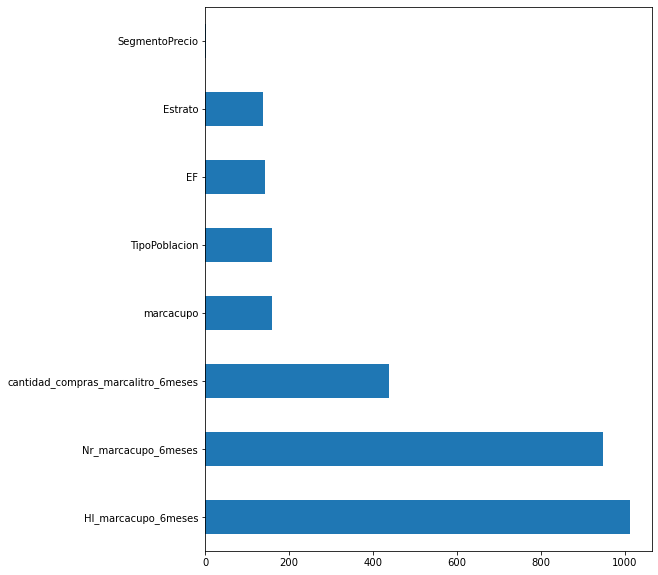

In [72]:
feat_imp = pd.Series(clf.feature_importance(), index=X.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

In [669]:
df_test2['Ejecuto_Promo'] = np.where(df_test2['flag_sales'].notnull(), 1, 0)

In [676]:
df_test2['Ejecuto_Promo'] = df_test2['y_pred']

In [677]:
df_test2.iloc[:,:4].to_csv('try2.csv', index = False)

# MEJORANDO MODELO

In [634]:
df_temporal.head()

,Cliente,Marca,Cupo,correlativo_mes,SegmentoPrecio,Nr,Hl,Dcto,marcacupo,Ejecuto_Promo,...,Hl_marcacupo_6meses,Nr_marcacupo_6meses,cantidad_compras_marcalitro_6meses,id_test,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF
0,1,44,10,1,2.0,6352.94,0.03,0.0,44-10,NaN,...,0.00,0.00,0,NaN,4,21,12,1,1,1
1,1,44,10,2,2.0,NaN,NaN,NaN,44-10,NaN,...,0.03,6352.94,1,NaN,4,21,12,1,1,1
2,1,44,10,3,2.0,NaN,NaN,NaN,44-10,NaN,...,0.03,6352.94,1,NaN,4,21,12,1,1,1
3,1,44,10,4,2.0,NaN,NaN,NaN,44-10,NaN,...,0.03,6352.94,1,NaN,4,21,12,1,1,1
4,1,44,10,5,2.0,NaN,NaN,NaN,44-10,NaN,...,0.03,6352.94,1,NaN,4,21,12,1,1,1


### 6 meses

In [652]:
df_temporal['Dcto_marcacupo_6meses'] = 0

In [653]:
for shift_time in range(1,7):
    df_temporal['id_test'] = df_temporal['id'].shift(shift_time)
    df_temporal['Dcto_marcacupo_6meses'] += np.where(df_temporal['Dcto'].shift(shift_time).notnull(), df_temporal['Dcto'].shift(shift_time), 0) * (df_temporal['id'] == df_temporal['id_test']).astype('int')

### Mes pasado

In [655]:
df_temporal['Hl_marcacupo_mesant'] = 0
df_temporal['Nr_marcacupo_mesant'] = 0
df_temporal['Dcto_marcacupo_mesant'] = 0
df_temporal['marcacupo_compra_mesant'] = 0

In [656]:
for shift_time in range(1,2):
    df_temporal['id_test'] = df_temporal['id'].shift(shift_time)
    df_temporal['Nr_marcacupo_mesant'] += np.where(df_temporal['Nr'].shift(shift_time).notnull(), df_temporal['Nr'].shift(shift_time), 0) * (df_temporal['id'] == df_temporal['id_test']).astype('int')
    df_temporal['Hl_marcacupo_mesant'] += np.where(df_temporal['Hl'].shift(shift_time).notnull(), df_temporal['Hl'].shift(shift_time), 0) * (df_temporal['id'] == df_temporal['id_test']).astype('int')
    df_temporal['Dcto_marcacupo_mesant'] += np.where(df_temporal['Dcto'].shift(shift_time).notnull(), df_temporal['Dcto'].shift(shift_time), 0) * (df_temporal['id'] == df_temporal['id_test']).astype('int')
    df_temporal['marcacupo_compra_mesant'] +=  (df_temporal['Nr'].shift(shift_time).notnull().astype('int'))*(df_temporal['id'] == df_temporal['id_test']).astype('int')

In [650]:
df_temporal.head()

,Cliente,Marca,Cupo,correlativo_mes,SegmentoPrecio,Nr,Hl,Dcto,marcacupo,Ejecuto_Promo,...,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,Hl_marcacupo_mesant,Nr_marcacupo_mesant,marcacupo_compra_mesant,id2
0,1,44,10,1,2.0,6352.94,0.03,0.0,44-10,NaN,...,4,21,12,1,1,1,0.00,0.00,0,1-1
1,1,44,10,2,2.0,NaN,NaN,NaN,44-10,NaN,...,4,21,12,1,1,1,0.03,6352.94,1,1-2
2,1,44,10,3,2.0,NaN,NaN,NaN,44-10,NaN,...,4,21,12,1,1,1,0.00,0.00,0,1-3
3,1,44,10,4,2.0,NaN,NaN,NaN,44-10,NaN,...,4,21,12,1,1,1,0.00,0.00,0,1-4
4,1,44,10,5,2.0,NaN,NaN,NaN,44-10,NaN,...,4,21,12,1,1,1,0.00,0.00,0,1-5


### Flags

In [681]:
list_id_marcacupo_promo = list(df_temporal[df_temporal['Ejecuto_Promo'] == 1]['id'])

In [682]:
#flag, el cliente activo una promo en esa marca-cupo
df_temporal['flag_promo'] = np.where(df_temporal['id'].isin(list_id_marcacupo_promo), 1, 0)

In [685]:
list_clientes_promo = list(df_temporal[df_temporal['Ejecuto_Promo'] == 1]['Cliente'])

In [686]:
#flag, el cliente activo alguna promo
df_temporal['flag_promo_general'] = np.where(df_temporal['Cliente'].isin(list_clientes_promo), 1, 0)

In [661]:
df_temporal['flag_consumo'] = df_temporal['Nr'].notnull().astype('int')

### Consumo Promedio (general y por marca-cupo)

In [649]:
df_temporal['id2'] = df_temporal['Cliente'].astype('str') + '-' + df_temporal['correlativo_mes'].astype('str')

In [691]:
# consumo general del cliente
df_consumo_gen = df_temporal[['id2', 'Nr', 'Hl', 'Dcto']].groupby('id2').agg('sum').reset_index()

In [699]:
df_consumo_gen.columns = ['id2', 'Nr_gen', 'Hl_gen', 'Dcto_gen']

In [702]:
df_temporal.shape

(6589800, 31)

In [706]:
df_temporal = df_temporal.merge(df_consumo_gen, how = 'left', on = 'id2')

In [707]:
df_temporal.head()

,Cliente,Marca,Cupo,correlativo_mes,SegmentoPrecio,Nr,Hl,Dcto,marcacupo,Ejecuto_Promo,...,id2,Dcto_marcacupo_6meses,Dcto_marcacupo_mesant,flag_consumo,flag_promo,flag_promo_general,id3,Nr_gen,Hl_gen,Dcto_gen
0,1,44,10,1,2.0,6352.94,0.03,0.0,44-10,NaN,...,1-1,0.0,0.0,1,0,1,1-1-44-10,591975.69,2.31,-6785.54
1,1,44,10,2,2.0,NaN,NaN,NaN,44-10,NaN,...,1-2,0.0,0.0,0,0,1,1-2-44-10,45316.23,0.29,0.00
2,1,44,10,3,2.0,NaN,NaN,NaN,44-10,NaN,...,1-3,0.0,0.0,0,0,1,1-3-44-10,246472.95,0.98,0.00
3,1,44,10,4,2.0,NaN,NaN,NaN,44-10,NaN,...,1-4,0.0,0.0,0,0,1,1-4-44-10,287908.57,1.04,0.00
4,1,44,10,5,2.0,NaN,NaN,NaN,44-10,NaN,...,1-5,0.0,0.0,0,0,1,1-5-44-10,130569.85,0.53,-3920.17


In [709]:
df_temporal['percent_Nr'] = df_temporal['Nr']/df_temporal['Nr_gen']
df_temporal['percent_Hl'] = df_temporal['Hl']/df_temporal['Hl_gen']
df_temporal['percent_Dcto'] = df_temporal['Dcto']/df_temporal['Dcto_gen']

In [710]:
df_temporal.head()

,Cliente,Marca,Cupo,correlativo_mes,SegmentoPrecio,Nr,Hl,Dcto,marcacupo,Ejecuto_Promo,...,flag_consumo,flag_promo,flag_promo_general,id3,Nr_gen,Hl_gen,Dcto_gen,percent_Nr,percent_Hl,percent_Dcto
0,1,44,10,1,2.0,6352.94,0.03,0.0,44-10,NaN,...,1,0,1,1-1-44-10,591975.69,2.31,-6785.54,0.010732,0.012987,-0.0
1,1,44,10,2,2.0,NaN,NaN,NaN,44-10,NaN,...,0,0,1,1-2-44-10,45316.23,0.29,0.00,NaN,NaN,NaN
2,1,44,10,3,2.0,NaN,NaN,NaN,44-10,NaN,...,0,0,1,1-3-44-10,246472.95,0.98,0.00,NaN,NaN,NaN
3,1,44,10,4,2.0,NaN,NaN,NaN,44-10,NaN,...,0,0,1,1-4-44-10,287908.57,1.04,0.00,NaN,NaN,NaN
4,1,44,10,5,2.0,NaN,NaN,NaN,44-10,NaN,...,0,0,1,1-5-44-10,130569.85,0.53,-3920.17,NaN,NaN,NaN


In [712]:
#df_temporal.to_csv('data_temp_save.csv', index = False)

In [713]:
#df_temporal.to_csv('data_temp_save.csv.gz', index = False, compression= 'gzip')

In [3]:
df_temporal = pd.read_csv('data_temp_save.csv.gz', encoding = 'latin1')

### Porcentajes de consumo (marca-cupo / general)

In [4]:
df_temporal['pHl_marcacupo_6meses'] = 0
df_temporal['pNr_marcacupo_6meses'] = 0
df_temporal['pDcto_marcacupo_6meses'] = 0

In [5]:
for shift_time in range(1,7):
    df_temporal['id_test'] = df_temporal['id'].shift(shift_time)
    df_temporal['pHl_marcacupo_6meses'] += np.where(df_temporal['percent_Nr'].shift(shift_time).notnull(), df_temporal['percent_Nr'].shift(shift_time), 0) * (df_temporal['id'] == df_temporal['id_test']).astype('int')
    df_temporal['pNr_marcacupo_6meses'] += np.where(df_temporal['percent_Hl'].shift(shift_time).notnull(), df_temporal['percent_Hl'].shift(shift_time), 0) * (df_temporal['id'] == df_temporal['id_test']).astype('int')
    df_temporal['pDcto_marcacupo_6meses'] += np.where(df_temporal['percent_Dcto'].shift(shift_time).notnull(), df_temporal['percent_Dcto'].shift(shift_time), 0) * (df_temporal['id'] == df_temporal['id_test']).astype('int')

In [6]:
df_temporal['pHl_marcacupo_6meses'] = np.where(df_temporal['cantidad_compras_marcalitro_6meses'] != 0, df_temporal['pHl_marcacupo_6meses'] / df_temporal['cantidad_compras_marcalitro_6meses'], 0)
df_temporal['pNr_marcacupo_6meses'] = np.where(df_temporal['cantidad_compras_marcalitro_6meses'] != 0, df_temporal['pNr_marcacupo_6meses'] / df_temporal['cantidad_compras_marcalitro_6meses'], 0)
df_temporal['pDcto_marcacupo_6meses'] = np.where(df_temporal['cantidad_compras_marcalitro_6meses'] != 0, df_temporal['pDcto_marcacupo_6meses'] / df_temporal['cantidad_compras_marcalitro_6meses'], 0)

In [7]:
df_temporal['Ejecuto_Promo2'] = np.where((df_temporal['Ejecuto_Promo'] == 1) & (df_temporal['Nr'].isnull()), 0, df_temporal['Ejecuto_Promo'])

In [8]:
df_ultima_compra = df_temporal[['Cliente', 'Marca', 'Cupo', 'correlativo_mes', 'flag_consumo', 'id', 'Nr', 'Hl', 'Dcto', 'Ejecuto_Promo2']]

In [9]:
df_ultima_compra['tiempo_ultimacompra'] = np.nan
df_ultima_compra['tiempo_ultimapromo'] = np.nan
df_ultima_compra['Nr_ultimo'] = np.nan
df_ultima_compra['Hl_ultimo'] = np.nan
df_ultima_compra['Dcto_ultimo'] = np.nan

C:\Users\Guillermo\anaconda3\envs\cv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Guillermo\anaconda3\envs\cv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Guillermo\anaconda3\envs\cv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [11]:
for shift_time in range(1,21):
    df_ultima_compra['id_test'] = df_ultima_compra['id'].shift(shift_time)
    df_ultima_compra['mes_test'] = df_ultima_compra['correlativo_mes'].shift(shift_time)
    df_ultima_compra['flag_test'] = df_ultima_compra['flag_consumo'].shift(shift_time)
    df_ultima_compra['Ejecuto_test'] = df_ultima_compra['Ejecuto_Promo2'].shift(shift_time)
    df_ultima_compra['Nr_test'] = df_ultima_compra['Nr'].shift(shift_time)
    df_ultima_compra['Hl_test'] = df_ultima_compra['Hl'].shift(shift_time)
    df_ultima_compra['Dcto_test'] = df_ultima_compra['Dcto'].shift(shift_time)
    
    df_ultima_compra['tiempo_ultimacompra'] = np.where((df_ultima_compra['tiempo_ultimacompra'].isnull())&(df_ultima_compra['id_test'] == df_ultima_compra['id']) & (df_ultima_compra['flag_test'] == 1), df_ultima_compra['correlativo_mes'] - df_ultima_compra['mes_test'],df_ultima_compra['tiempo_ultimacompra'])
    df_ultima_compra['tiempo_ultimapromo'] = np.where((df_ultima_compra['tiempo_ultimapromo'].isnull())&(df_ultima_compra['id_test'] == df_ultima_compra['id']) & (df_ultima_compra['Ejecuto_test'] == 1), df_ultima_compra['correlativo_mes'] - df_ultima_compra['mes_test'],df_ultima_compra['tiempo_ultimapromo'])
    df_ultima_compra['Nr_ultimo'] = np.where((df_ultima_compra['Nr_ultimo'].isnull())&(df_ultima_compra['id_test'] == df_ultima_compra['id']) & (df_ultima_compra['flag_test'] == 1), df_ultima_compra['Nr_test'],df_ultima_compra['Nr_ultimo'])
    df_ultima_compra['Hl_ultimo'] = np.where((df_ultima_compra['Hl_ultimo'].isnull())&(df_ultima_compra['id_test'] == df_ultima_compra['id']) & (df_ultima_compra['flag_test'] == 1), df_ultima_compra['Hl_test'],df_ultima_compra['Hl_ultimo'])
    df_ultima_compra['Dcto_ultimo'] = np.where((df_ultima_compra['Dcto_ultimo'].isnull())&(df_ultima_compra['id_test'] == df_ultima_compra['id']) & (df_ultima_compra['flag_test'] == 1), df_ultima_compra['Dcto_test'],df_ultima_compra['Dcto_ultimo'])
    

C:\Users\Guillermo\anaconda3\envs\cv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Guillermo\anaconda3\envs\cv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Guillermo\anaconda3\envs\cv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [12]:
# asumimos que no compro hace mucho timpo (20 meses)
df_ultima_compra['tiempo_ultimacompra'] = df_ultima_compra['tiempo_ultimacompra'].fillna(20)
df_ultima_compra['tiempo_ultimapromo'] = df_ultima_compra['tiempo_ultimapromo'].fillna(20)
df_ultima_compra['Nr_ultimot'] = np.where(df_ultima_compra['tiempo_ultimacompra'] != 0, df_ultima_compra['Nr_ultimo'] / df_ultima_compra['tiempo_ultimacompra'], df_ultima_compra['Nr_ultimo'])
df_ultima_compra['Hl_ultimot'] = np.where(df_ultima_compra['tiempo_ultimacompra'] != 0, df_ultima_compra['Hl_ultimo'] / df_ultima_compra['tiempo_ultimacompra'], df_ultima_compra['Hl_ultimo'])
df_ultima_compra['Dcto_ultimot'] = np.where(df_ultima_compra['tiempo_ultimacompra'] != 0, df_ultima_compra['Dcto_ultimo'] / df_ultima_compra['tiempo_ultimacompra'], df_ultima_compra['Dcto_ultimo'])

C:\Users\Guillermo\anaconda3\envs\cv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Guillermo\anaconda3\envs\cv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Guillermo\anaconda3\envs\cv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [13]:
df_temporal['tiempo_ultimacompra'] = df_ultima_compra['tiempo_ultimacompra']
df_temporal['tiempo_ultimapromo'] = df_ultima_compra['tiempo_ultimapromo']
df_temporal['Nr_ultimot'] = df_ultima_compra['Nr_ultimot']
df_temporal['Nr_ultimo'] = df_ultima_compra['Nr_ultimo']
df_temporal['Hl_ultimot'] = df_ultima_compra['Hl_ultimot']
df_temporal['Hl_ultimo'] = df_ultima_compra['Hl_ultimo']
df_temporal['Dcto_ultimot'] = df_ultima_compra['Dcto_ultimot']
df_temporal['Dcto_ultimo'] = df_ultima_compra['Dcto_ultimo']

In [373]:
var_cat = ['marcacupo', 'TipoPoblacion', 'Estrato', 'EF', 'SegmentoPrecio', 'Region', 'SubCanal', 'Gerencia']
var_num = ['Hl_marcacupo_6meses', 'Nr_marcacupo_6meses', 'Dcto_marcacupo_6meses','cantidad_compras_marcalitro_6meses',
          'Hl_marcacupo_mesant', 'Nr_marcacupo_mesant', 'Dcto_marcacupo_mesant',
          'pHl_marcacupo_6meses', 'pNr_marcacupo_6meses', 'pDcto_marcacupo_6meses', 
          'Hl_ultimo', 'Nr_ultimo', 'Dcto_ultimo',
          'Hl_ultimot', 'Nr_ultimot', 'Dcto_ultimot',
          'tiempo_ultimacompra', 'tiempo_ultimapromo']

In [409]:
df_temporal.head().T

,0,1,2,3,4
Cliente,1,1,1,1,1
Marca,44,44,44,44,44
Cupo,10,10,10,10,10
correlativo_mes,1,2,3,4,5
SegmentoPrecio,2,2,2,2,2
Nr,6352.94,NaN,NaN,NaN,NaN
Hl,0.03,NaN,NaN,NaN,NaN
Dcto,0,NaN,NaN,NaN,NaN
marcacupo,44-10,44-10,44-10,44-10,44-10
Ejecuto_Promo,NaN,NaN,NaN,NaN,NaN


In [424]:
df_frec = df_temporal[['correlativo_mes', 'flag_promo']].copy()

In [427]:
df_frec = df_frec[df_frec['correlativo_mes']!=20]

In [431]:
df_frec['correlativo_mes'] = df_frec['correlativo_mes']%12
df_frec['correlativo_mes'] = np.where(df_frec['correlativo_mes']== 0, 12, df_frec['correlativo_mes'])

C:\Users\Guillermo\anaconda3\envs\cv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Guillermo\anaconda3\envs\cv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [413]:
df_frec['flag_promo'].value_counts()

0    6424700
1     165100
Name: flag_promo, dtype: int64

### MODELO BASELINE CON NUEVA DATA

In [100]:
data = df_temporal[df_temporal['Ejecuto_Promo2'].notnull()][ var_cat + var_num + ['Ejecuto_Promo2', 'correlativo_mes']].copy()

In [101]:
data = data.query("correlativo_mes < 20")

In [102]:
data.Ejecuto_Promo2.value_counts()

0.0    50725
1.0    20567
Name: Ejecuto_Promo2, dtype: int64

In [103]:
data = data.drop(columns=['correlativo_mes'])

In [104]:
var_log = [
 'Nr_marcacupo_6meses',
 'Dcto_marcacupo_6meses',
 'Nr_marcacupo_mesant',
 'Dcto_marcacupo_mesant',
 'Nr_ultimo',
 'Dcto_ultimo',
 'Nr_ultimot',
 'Dcto_ultimot']

In [105]:
def log_column(x):
    if x == 0:
        return 0
    if x <0:
        return -np.log(x)
    else:
        return np.log(x)

In [106]:
#for col in var_log:
#    data[col] = data[col].apply(lambda x: log_column(x))

In [107]:
X = data[var_cat + var_num]
y = data['Ejecuto_Promo2']

In [108]:
for col_cat in var_cat:
    X[col_cat] = X[col_cat].astype('category')

C:\Users\Guillermo\anaconda3\envs\cv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [109]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [110]:
d_train=lgb.Dataset(X_train, label=y_train)

In [111]:
params={}
params['learning_rate']=0.05
params['boosting_type']='gbdt'
params['objective']='binary'
params['metric']='binary_logloss' 
params['max_depth']=5

In [112]:
d_train = lgb.Dataset(X, label=y)

In [113]:
clf_baseline = lgb.train(params,d_train,100)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 20567, number of negative: 50725
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3914
[LightGBM] [Info] Number of data points in the train set: 71292, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.288490 -> initscore=-0.902731
[LightGBM] [Info] Start training from score -0.902731
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

In [114]:
y_pred = clf_baseline.predict(X_test)

In [115]:
y_pred

array([0.04666547, 0.55842507, 0.1056556 , ..., 0.03317864, 0.42521817,
       0.13540839])

In [116]:
roc_auc_score(y_test, y_pred)

0.8188185476900521

In [117]:
df_try1 = df_temporal[df_temporal['correlativo_mes'] == 20].copy()

In [118]:
df_test2 = df_test.copy()

In [119]:
df_test2['id'] = df_test2['Cliente'].astype('str') + '-' + df_test2['Marca'].astype('str') + '-' + df_test2['Cupo'].astype('str')

In [120]:
df_test2 = df_test2.merge(df_try1[['id']+var_cat+var_num], how = 'left', on='id')

In [121]:
df_test2['marcacupo'] = df_test2['Marca'].astype('str') + '-' + df_test2['Cupo'].astype('str')

In [122]:
for col_cat in var_cat:
    df_test2[col_cat] = df_test2[col_cat].astype('category')

In [123]:
df_test2['y_pred'] = clf_baseline.predict(df_test2[var_cat + var_num])

In [124]:
df_test2['Ejecuto_Promo'] = np.where(df_test2['flag_sales'].notnull(), df_test2['y_pred'], 0)

In [125]:
df_test2[df_test2['flag_sales'].isnull()]['y_pred'].value_counts()

0.108630    5130
0.189907     651
0.119664     465
Name: y_pred, dtype: int64

In [126]:
df_write = df_test2.iloc[:,:4]

In [127]:
df_write['Ejecuto_Promo'] =  1 -df_write['Ejecuto_Promo'] 

In [128]:
df_write.to_csv('try7.csv', index = False)

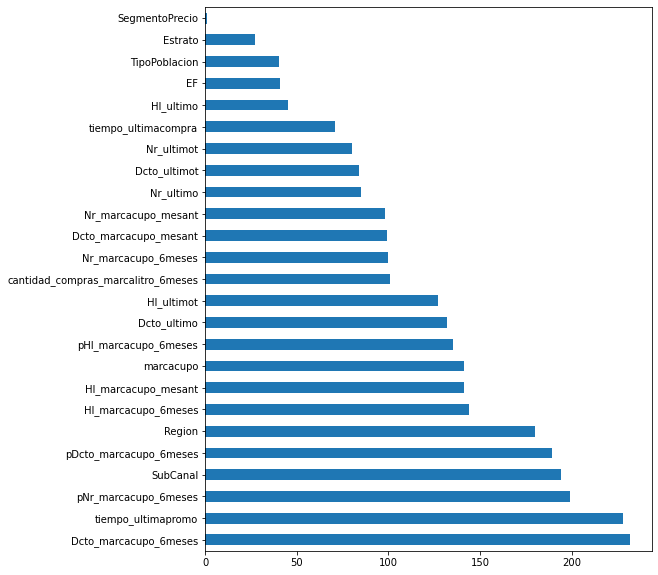

In [129]:
feat_imp = pd.Series(clf_baseline.feature_importance(), index=X.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

### TUNEO HIPERPARAMETROS

In [374]:
data = df_temporal[df_temporal['Ejecuto_Promo2'].notnull()][ var_cat + var_num + ['Ejecuto_Promo2', 'correlativo_mes']].copy()

In [375]:
data = data.query("correlativo_mes < 20")

In [376]:
data.Ejecuto_Promo2.value_counts()

0.0    50725
1.0    20567
Name: Ejecuto_Promo2, dtype: int64

In [377]:
data = data.drop(columns=['correlativo_mes'])

In [378]:
var_log = [
 'Nr_marcacupo_6meses',
 'Dcto_marcacupo_6meses',
 'Nr_marcacupo_mesant',
 'Dcto_marcacupo_mesant',
 'Nr_ultimo',
 'Dcto_ultimo',
 'Nr_ultimot',
 'Dcto_ultimot']

In [379]:
def log_column(x):
    if x == 0:
        return 0
    if x <0:
        return -np.log(x)
    else:
        return np.log(x)

In [380]:
#for col in var_log:
#    data[col] = data[col].apply(lambda x: log_column(x))

In [381]:
X = data[var_cat + var_num]
y = data['Ejecuto_Promo2']

In [382]:
for col_cat in var_cat:
    X[col_cat] = X[col_cat].astype('category')

C:\Users\Guillermo\anaconda3\envs\cv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [383]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [384]:
lgb_params = {}

In [385]:
'''lgb_params = {'bagging_fraction': 0.8601714084175757,
 'feature_fraction': 0.6823308715183678,
 'learning_rate': 0.10327114294921963,
 'max_bin': 86,
 'max_depth': 17,
 'min_data_in_leaf': 68,
 'min_sum_hessian_in_leaf': 34.37343536894455,
 'num_leaves': 29,
 'subsample': 0.19158687841627253,
 'objective': 'binary',
 'metric': 'binary_logloss',
 'is_unbalance': True,
 'boost_from_average': False}'''

"lgb_params = {'bagging_fraction': 0.8601714084175757,\n 'feature_fraction': 0.6823308715183678,\n 'learning_rate': 0.10327114294921963,\n 'max_bin': 86,\n 'max_depth': 17,\n 'min_data_in_leaf': 68,\n 'min_sum_hessian_in_leaf': 34.37343536894455,\n 'num_leaves': 29,\n 'subsample': 0.19158687841627253,\n 'objective': 'binary',\n 'metric': 'binary_logloss',\n 'is_unbalance': True,\n 'boost_from_average': False}"

In [436]:
lgb_params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric':'auc',
    'learning_rate': 0.01,
    #'is_unbalance': 'true',  #because training data is unbalance (replaced with scale_pos_weight)
    'num_leaves': 31,  # we should let it be smaller than 2^(max_depth)
    'max_depth': -1,  # -1 means no limit
    'min_child_samples': 20,  # Minimum number of data need in a child(min_data_in_leaf)
    'max_bin': 255,  # Number of bucketed bin for feature values
    'subsample': 0.6,  # Subsample ratio of the training instance.
    'subsample_freq': 0,  # frequence of subsample, <=0 means no enable
    'colsample_bytree': 0.3,  # Subsample ratio of columns when constructing each tree.
    'min_child_weight': 5,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
    'subsample_for_bin': 200000,  # Number of samples for constructing bin
    'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
    'reg_alpha': 0,  # L1 regularization term on weights
    'reg_lambda': 0,  # L2 regularization term on weights
    'nthread': 4,
    'verbose': 0,
}

In [437]:
d_train = lgb.Dataset(X, label=y)

In [438]:
clf = lgb.train(params,d_train,1000)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 20567, number of negative: 50725
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002834 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3949
[LightGBM] [Info] Number of data points in the train set: 71292, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.288490 -> initscore=-0.902731
[LightGBM] [Info] Start training from score -0.902731
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [439]:
y_pred = clf.predict(X_test)

In [440]:
y_pred

array([0.02680298, 0.6026548 , 0.17595914, ..., 0.02561285, 0.6935894 ,
       0.14253137])

In [441]:
roc_auc_score(y_test, y_pred)

0.8820769364739852

In [392]:
df_try1 = df_temporal[df_temporal['correlativo_mes'] == 20].copy()

In [393]:
df_test2 = df_test.copy()

In [394]:
df_test2['id'] = df_test2['Cliente'].astype('str') + '-' + df_test2['Marca'].astype('str') + '-' + df_test2['Cupo'].astype('str')

In [395]:
df_test2 = df_test2.merge(df_try1[['id']+var_cat+var_num], how = 'left', on='id')

In [396]:
df_test2['marcacupo'] = df_test2['Marca'].astype('str') + '-' + df_test2['Cupo'].astype('str')

In [397]:
for col_cat in var_cat:
    df_test2[col_cat] = df_test2[col_cat].astype('category')

In [398]:
#for col in var_log:
#    df_test2[col] = df_test2[col].apply(lambda x: log_column(x))

In [399]:
df_test2['y_pred'] = clf.predict(df_test2[var_cat + var_num])

In [400]:
df_test2['Ejecuto_Promo'] = np.where(df_test2['flag_sales'].notnull(), df_test2['y_pred'], 0)

In [401]:
df_test2[df_test2['flag_sales'].isnull()]['y_pred'].value_counts()

0.091267    5130
0.169425     651
0.035616     465
Name: y_pred, dtype: int64

In [402]:
df_write = df_test2.iloc[:,:4]

In [403]:
df_write['Ejecuto_Promo'] =  1 -df_write['Ejecuto_Promo'] 

In [404]:
df_write.to_csv('try8.csv', index = False)

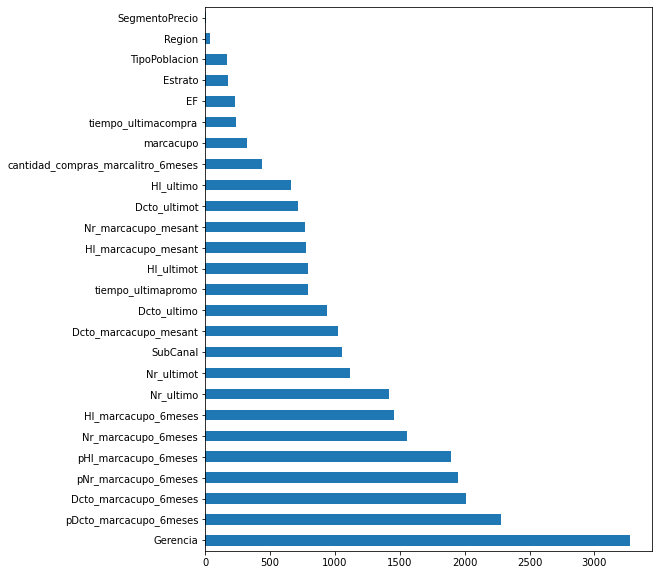

In [406]:
feat_imp = pd.Series(clf.feature_importance(), index=X.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))